   # Data Visualization:

In [72]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

missing_values = ['na','NA', 'N/A', 'N/a', 'not available', 'missing', np.nan]
df = pd.read_csv('dataset.csv', na_values = missing_values)

#fxn to remove duplicates
def remove_dup(dataframe):
    org_df = dataframe.drop_duplicates()
    return org_df

def clean_data(dataframe):
    a = remove_dup(dataframe) #using the fxn to remove duplicates
    a = a.dropna(how = 'all') #drop the records that have all na values
    a = a.dropna(axis=1, how='all') #drop the columns that have all na values
    return a

dff = clean_data(df)

### After some pre-processing and cleaning, my dataset is now ready for visualization. It contains 3091853 rows and 14 columns.

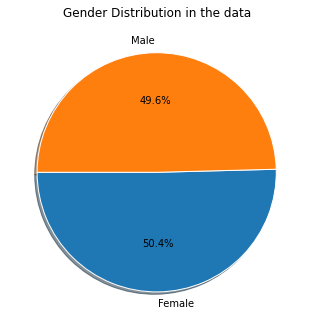

In [75]:
gender_count = dff.gender.value_counts()

#using a piechart to plot gender

plt.figure(figsize=(12,5.5))
plt.title("Gender Distribution in the data")
plt.pie(gender_count, labels=gender_count.index, wedgeprops= {'edgecolor':'white'}, autopct='%1.1f%%', shadow=True, startangle=180);


#### Understanding any data on the basis of gender distribution is very important because it gives the company/organization a gist of their customers by providing a clear idea of how their product/services are being used.
#### I have used a pie chart here to show the distribution because it has only two items to show. I wanted to display them in percentages. It shows that the percentages of females are comparatively higher in the data, although the difference is not that much.

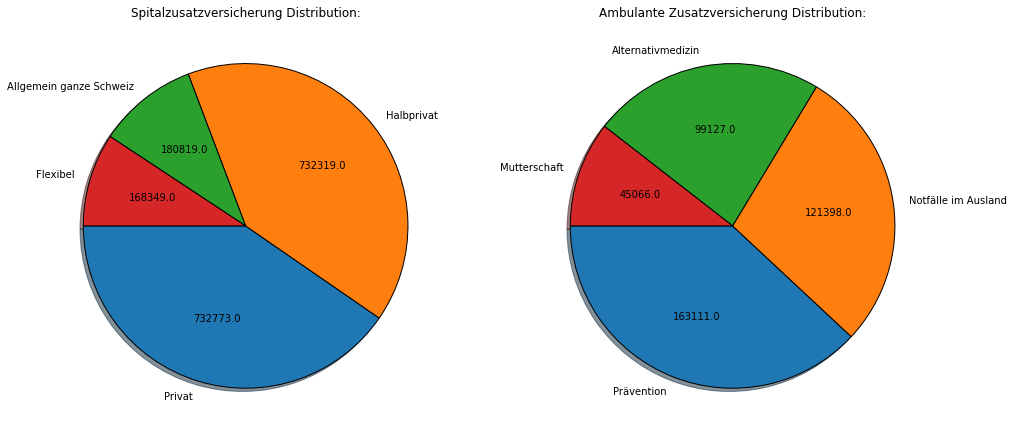

In [76]:
fig, axes = plt.subplots(1,2, figsize= (16,8))

spital_count = dff.Spitalzusatzversicherung.value_counts()

#defining a function to calculate absolute value
def absolute_value(val):
    a  = np.round(val/100.*spital_count.sum(), 0)
    return a

#using a piechart to plot gender
#For axes(0):


axes[0].set_title("Spitalzusatzversicherung Distribution:")
axes[0].pie(spital_count, labels=spital_count.index, wedgeprops= {'edgecolor':'black'}, autopct=absolute_value, shadow = True, startangle=180);

ambilante_count = dff['Ambulante Zusatzversicherung'].value_counts()

#defining a function to calculate absolute value
def absolute_value(val):
    a  = np.round(val/100.*ambilante_count.sum(), 0)
    return a

#using a piechart to plot gender

axes[1].set_title("Ambulante Zusatzversicherung Distribution:")
axes[1].pie(ambilante_count, labels=ambilante_count.index, wedgeprops= {'edgecolor':'black'}, autopct=absolute_value, shadow = True, startangle=180);


#### I used Pie charts to show the total count of the unique values in two other columns(Spitalzusatzversicherung and Ambulante Zusatzversicherung) using multiple subplots. Again, one of the reasons I used a pie chart here is because there are 5 or fewer values, which makes it convenient for display.


#### However, since it is not immediately apparent as to which value has more counts(like in the case of Spitalzusatzversicherung, it is difficult to determine at first glance whether Halbprivat or Privat has more counts just by looking at the figure). So, I thought it would be better to display this using a bar plot instead, as we can easily sort the values as well.

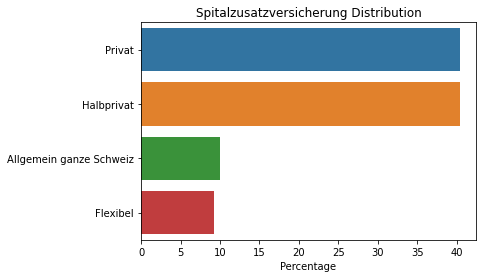

In [77]:
spital_count = dff.Spitalzusatzversicherung.value_counts()

spital_percent = (spital_count * 100 / dff.Spitalzusatzversicherung.count()).round(2)


sns.barplot(x= spital_percent, y= spital_percent.index)
plt.title('Spitalzusatzversicherung Distribution')
plt.xlabel("Percentage");

#### Thus, it is clear that Privat has the highest count, where as Flexibel has the least.

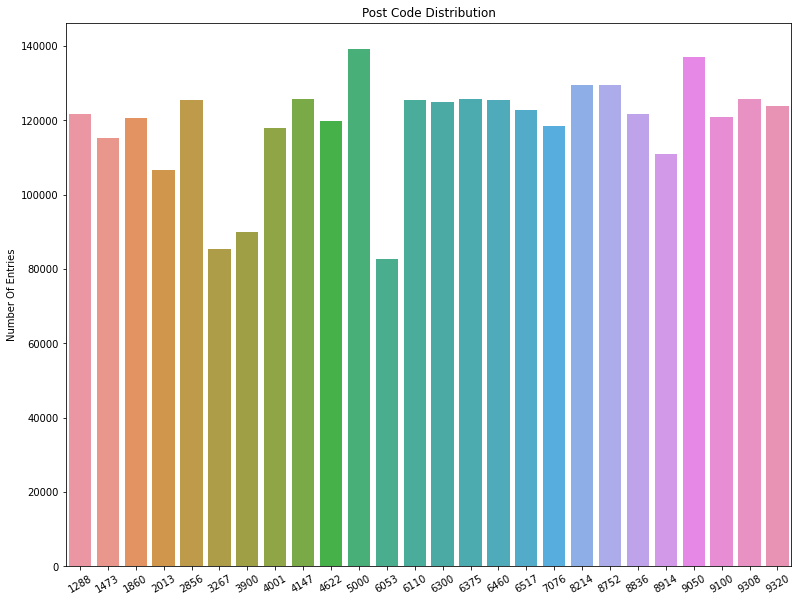

In [78]:
pc_count = dff.post_code.value_counts()
pc_count

plt.figure(figsize = (13,10))
sns.barplot(x= pc_count.index, y= pc_count)
plt.title('Post Code Distribution')
plt.ylabel("Number Of Entries");
plt.xticks(rotation=750);

#### Similarly, this is a vertical barplot that shows the counts of all the unique post codes. From this, we can conclude that '5000' has the highest number of entries, whereas '6053' has the least.

In [79]:
franchise_pc = dff.groupby('Franchise').post_code.value_counts().unstack()
franchise_pc

post_code,1288,1473,1860,2013,2856,3267,3900,4001,4147,4622,...,6517,7076,8214,8752,8836,8914,9050,9100,9308,9320
Franchise,,,,,,,,,,,,,,,,,,,,,
0.0,14244,13361,14079,11632,15017,10900,11596,13996,15149,14314,...,14425,14035,15460,14908,13937,12769,16393,14372,15183,14360
1000.0,14278,13226,13995,11609,15027,10916,11631,14072,15134,13993,...,14426,13950,15520,15233,13929,13030,16323,14387,15149,14574
3000.0,14242,13260,14082,11577,15062,10922,11547,13994,15238,14138,...,14346,14024,15540,15016,13919,12880,16338,14455,15212,14561
5000.0,14265,13289,14026,11610,15176,10930,11604,13999,15097,14155,...,14342,14024,15521,15107,14013,12859,16291,14283,15139,14710


#### The above table shows the distribution of Franchise in accordance with the postcodes, but the tabular form makes it difficult to determine the highest or the lowest count, and more. So, I've used a heatmap to display the magnitude(values) as different colors in these two dimensions:
 

<AxesSubplot:xlabel='post_code', ylabel='Franchise'>

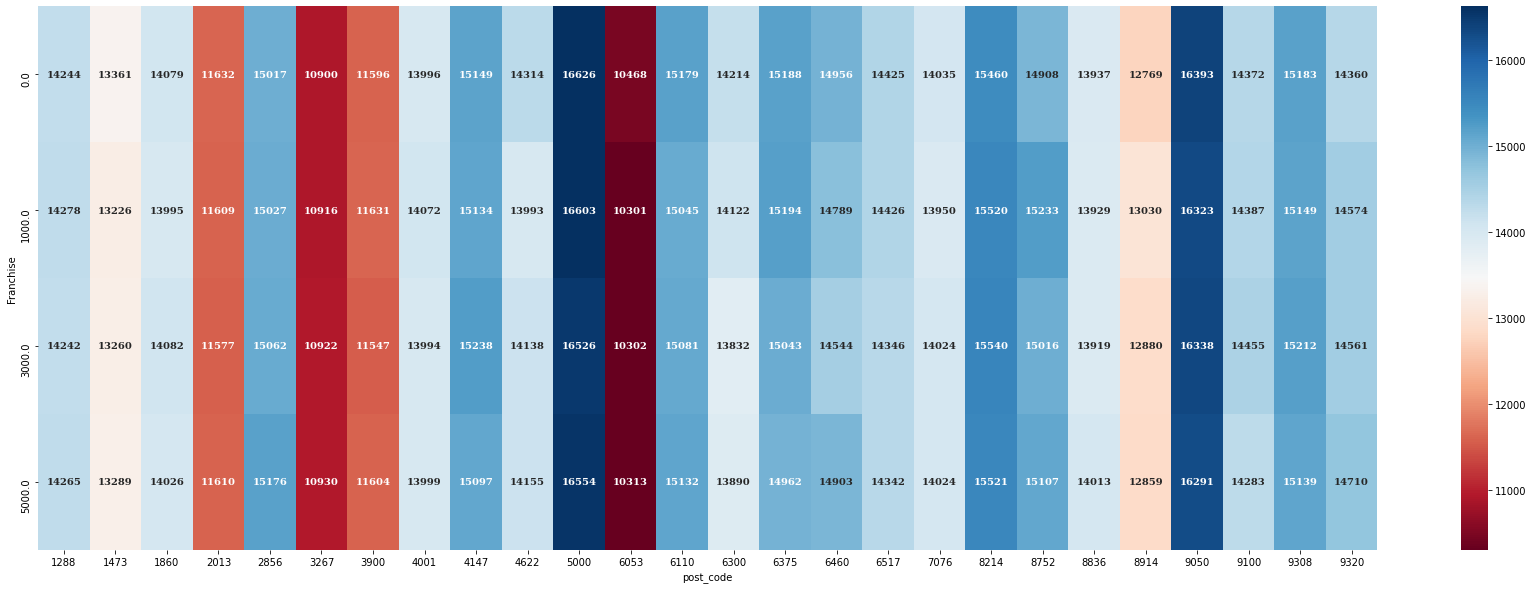

In [80]:

plt.figure(figsize = (30,10))
sns.heatmap(franchise_pc, cmap="RdBu", annot=True, fmt='.0f', annot_kws={'fontsize':10, 'fontweight':'bold', 'fontfamily':'serif'})


#### This makes it much easier to understand the relationship between the two factors. For instance, we can determine at first glance that the post code '5000' has the highest count across all the Franshises as it has the darkest shade of blue. And among that, the highest count is in Franchise '0.0' with the count of 16626.

#### Similarly, I have used another heatmap to show the distribution of date of births and post codes:

<AxesSubplot:xlabel='dob', ylabel='post_code'>

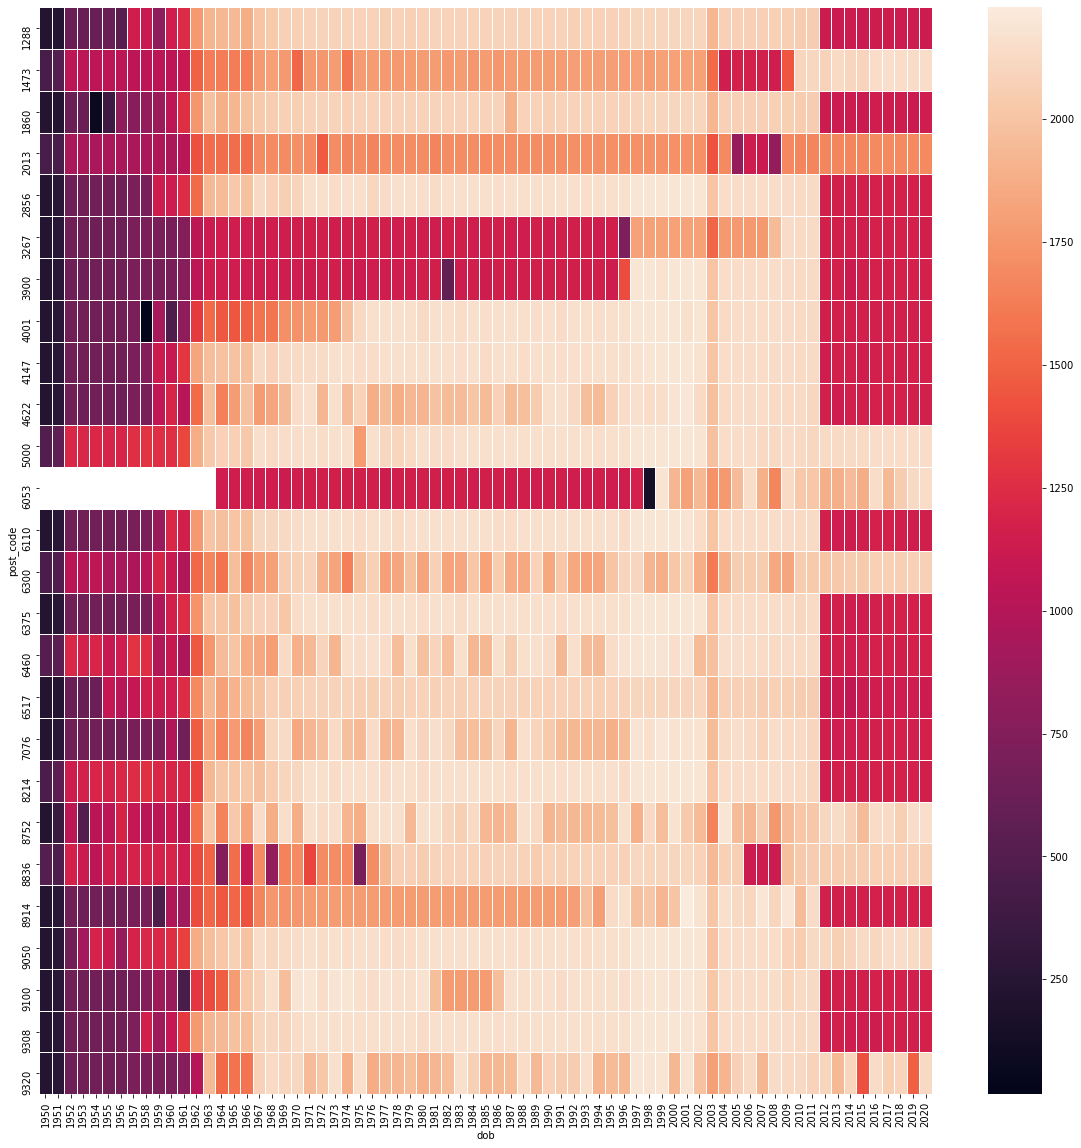

In [83]:
pc_dob = dff.groupby('post_code').dob.value_counts().unstack()

plt.figure(figsize = (20,20))
sns.heatmap(pc_dob, linewidth=1)

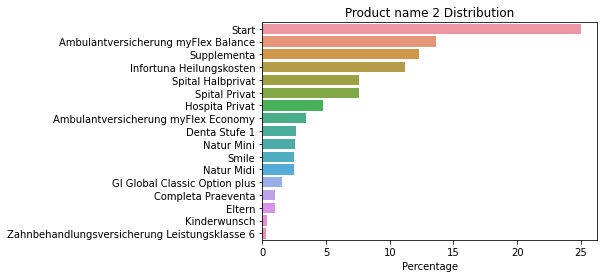

In [84]:
p2_count = dff['Product name 2'].value_counts()
p2_percent = (p2_count * 100 / dff['Product name 2'].count()).round(2)


sns.barplot(x= p2_percent, y= p2_percent.index)
plt.title('Product name 2 Distribution')
plt.xlabel("Percentage");

#### The figure shows that 'Strat' is the most bought/preferred product in the Product name 2 distribution where as 'Zahnbehandlungsversicherung Leistungsklasse 6' is the least.

### Finally, to determine the available values and missing values in each column, as well as their percentages, I have first created some functions to get a dictionary with the entire list. Then I converted it into a dataframe and used it to create different bar plots to display the required values:

In [86]:
#function to count the available & missing values and their percentages:

def count_values(dataframe, columnName):
    out_kwargs = {}
    yes_count = dataframe[columnName].notna().sum()
    no_count = dataframe[columnName].isna().sum()
    total_count = yes_count+no_count
    yes_count_percent = (yes_count * 100 / total_count).round(2)
    no_count_percent = (no_count*100 / total_count).round(2)
    out_kwargs['Available Values'] = yes_count
    out_kwargs['Percentage(%) Of Available Values'] = yes_count_percent
    out_kwargs['Missing Values'] = no_count
    out_kwargs['Percentage(%) Of Missing Values'] = no_count_percent
    out_kwargs['Total Values'] = yes_count+no_count
    
    return out_kwargs

#function to get the required values for all the columns:
def get_all_count_values(dataframe, col_list):
    rv_list = []
    for each in col_list:
        rv = count_values(dataframe, each)
        rv.update({'ColumnName': each})
        rv_list.append(rv)
    return rv_list    

list_all_values = get_all_count_values(dff, list(dff.columns))

count_df = pd.DataFrame(list_all_values)
count_df.set_index('ColumnName', inplace=True)


In [87]:
values_count_df = count_df[['Available Values', 'Missing Values']]
percent_count_df = count_df[['Percentage(%) Of Available Values', 'Percentage(%) Of Missing Values']]

#function to calculate both:
def get_ap_mp(dataframe):
    plt.figure(figsize=(7,6))
    x = list(dataframe.index)
    av = list(dataframe.iloc[:,0])
    mv = list(dataframe.iloc[:,1])
    bar1 = np.arange(len(av))
    bar2 = [i for i in bar1]


    fig, ax = plt.subplots();
    ax.set_title(dataframe.columns[0])
    ax.barh(bar1, av);
    ax.set_yticks(bar1);
    ax.set_yticklabels(x);
    ax.bar_label(ax.containers[0]);

    fig, ax = plt.subplots();
    ax.set_title(dataframe.columns[1], color = 'Red')
    ax.barh(bar2, mv, color = "Red");
    ax.set_yticks(bar2);
    ax.set_yticklabels(x);


    # new helper method to auto-label bars
    ax.bar_label(ax.containers[0]);
    

#function to calculate values(vertical):
def get_av_mv(dataframe):
    plt.figure(figsize=(30,20))
    w = 0.25
    x= list(dataframe.index)
    av = list(dataframe.iloc[:,0])
    mv = list(dataframe.iloc[:,1])
    yv = np.linspace(0, 3091853, 5)
    
    bar1 = np.arange(len(av))
    bar2 = [i+w for i in bar1]

    plt.bar(bar1, av, w, label = dataframe.columns[0] );
    plt.bar(bar2, mv, w, label = dataframe.columns[1], color='Red');

    plt.xlabel("Column Names", fontsize=25);
    plt.ylabel("Count", fontsize=25)
    plt.title('Available vs Missing Distribution', fontsize= 30);
    plt.xticks(bar1+0.1, x, rotation=800, fontsize=20);
    plt.yticks(yv)

    for index,data in enumerate(av):
        plt.text(x=index , y =data-178888 , s=f"{data}" , fontdict=dict(fontsize=15), rotation = 'vertical')



    plt.legend()

### Now, I have used barplots to display the values:

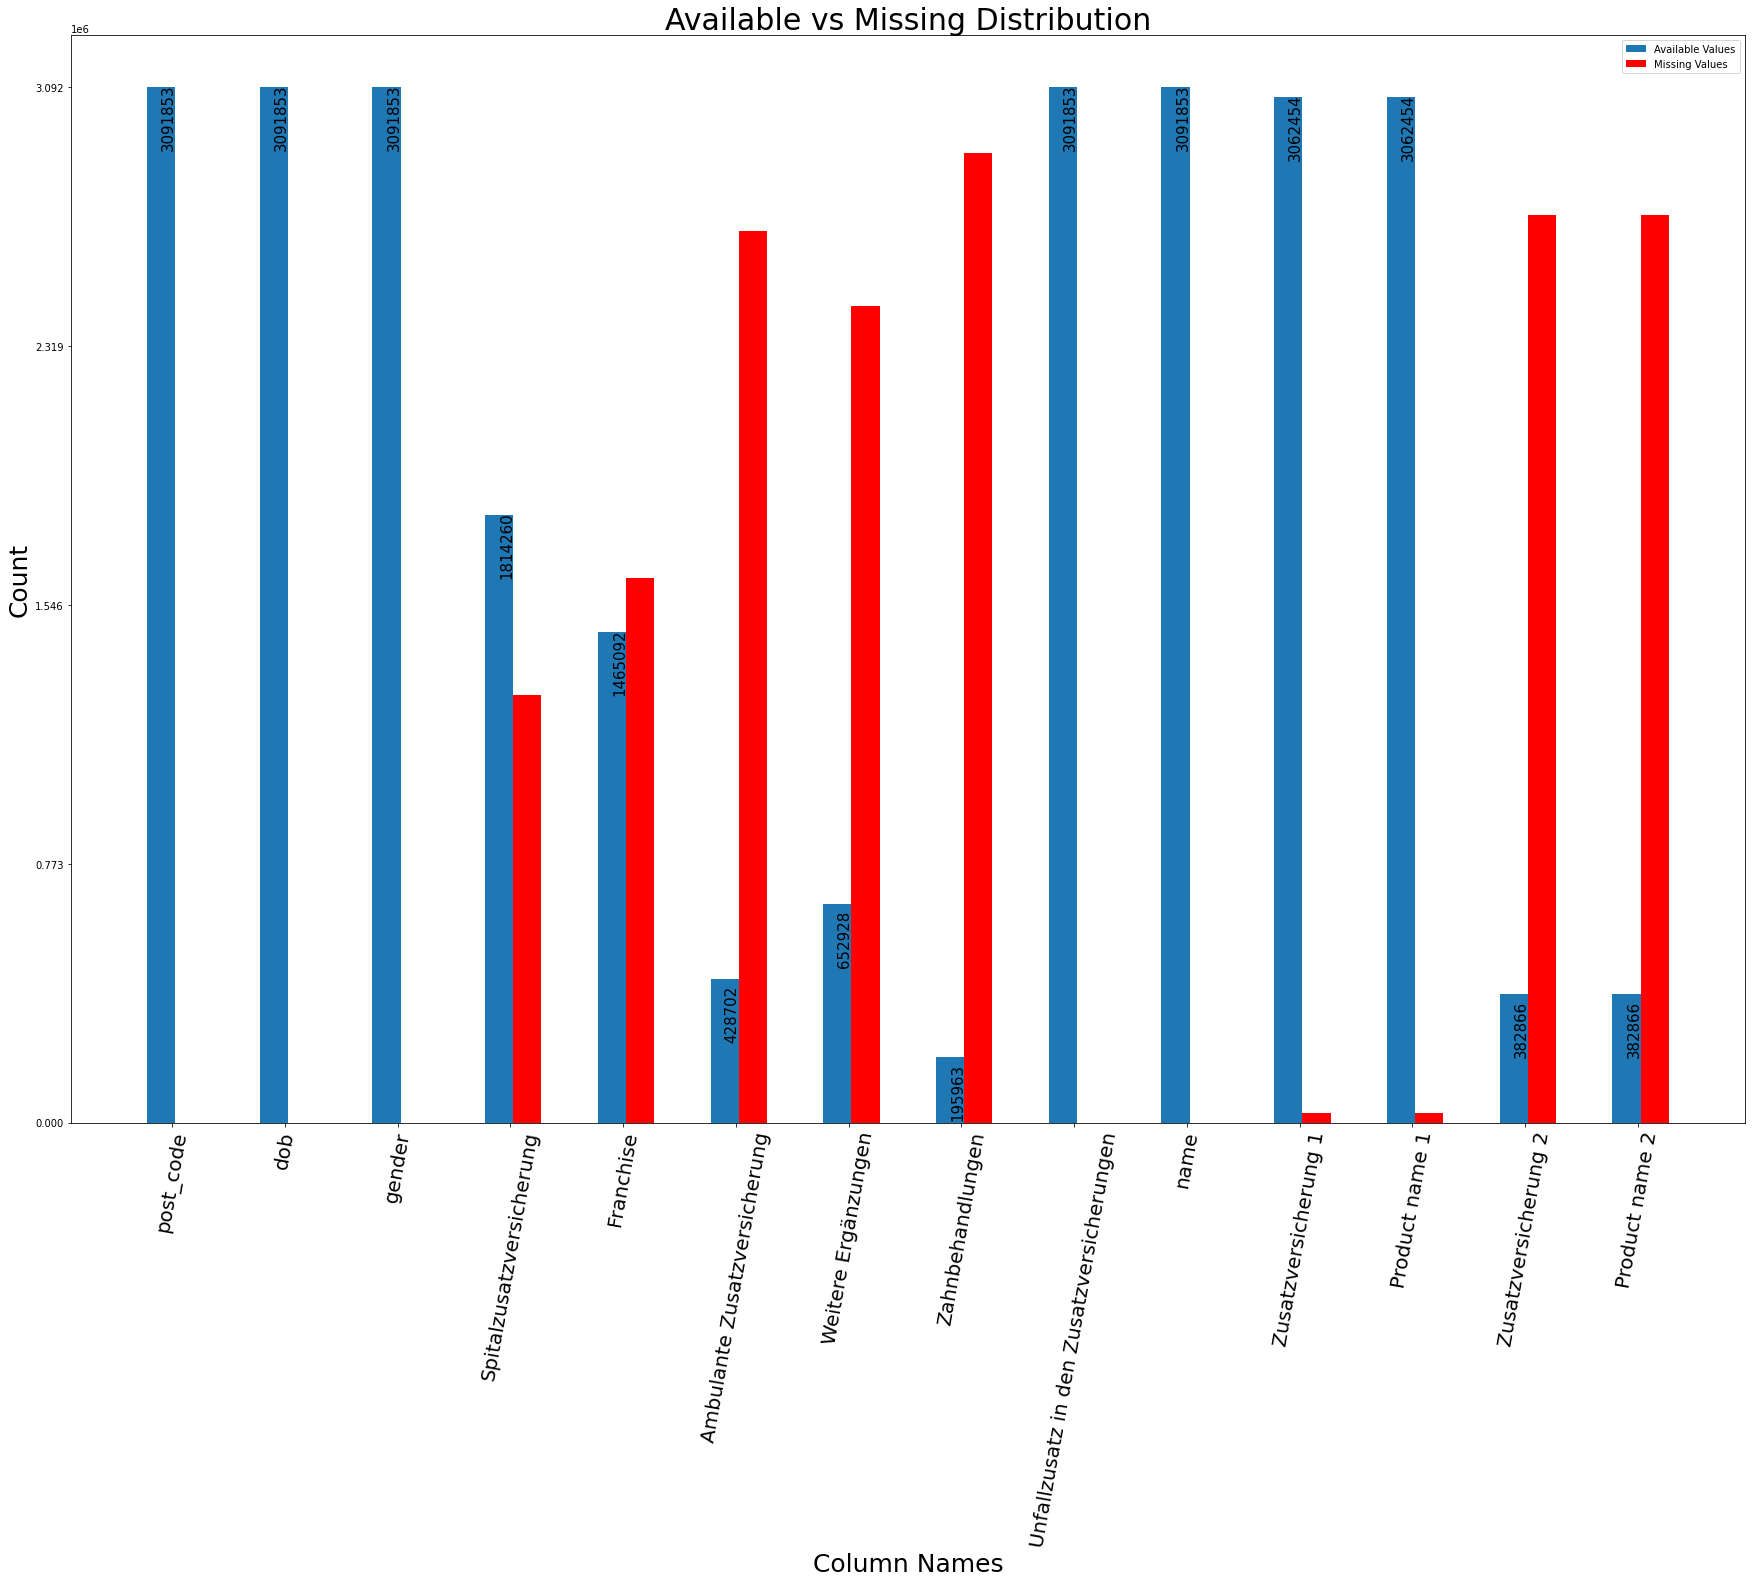

In [88]:
get_av_mv(values_count_df)

#### This one is just for a general overview. For a detailed look:

<Figure size 504x432 with 0 Axes>

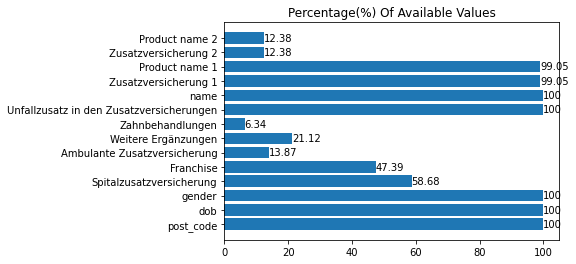

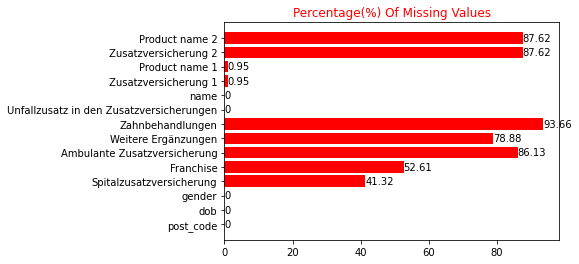

In [89]:
#percent
get_ap_mp(percent_count_df)

<Figure size 504x432 with 0 Axes>

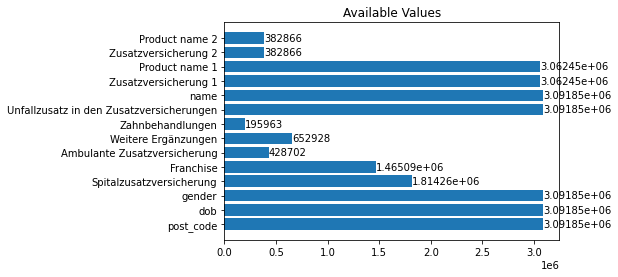

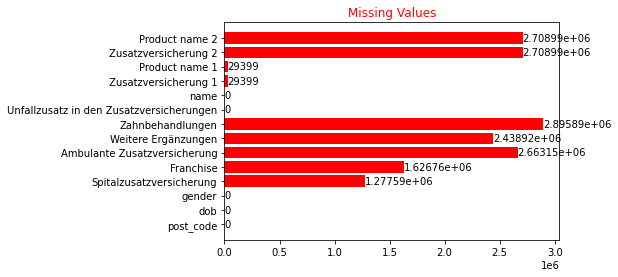

In [70]:
#values
get_ap_mp(values_count_df)

### Hence, these barplots show the count as well as percentages of all the available and missing values for each column in the dataset. This will be very helpful for QA analysts to quickly spot anomalies. Moreover, one can quickly prepare a chart to display available and missing values on any dataset by simply passing the parameters to the functions I have created for this(some changes might be required beforehand in some cases.)